# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.
Tipo de exámen https://drive.google.com/file/d/1vkdFLsj8qsIR-TlqpcYBMu5z_HUncsyh/view

Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E1ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1CristianZapata*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

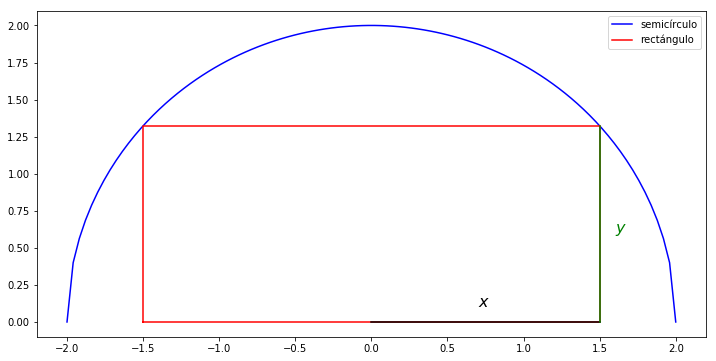

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

El área del rectángulo $A_R$ está dada por 

$$A_R = bh$$

Pero como $b = 2x$ y $h=y$ entonces

$$A_R = 2xy$$

La variable $y$ se puede escribir como función de $x$ usando el teorema de pitágoras

$$y = \sqrt{4-x^2}$$

Reemplazando finalmente se tiene que

$$A_R(x) = 2x\sqrt{4-x^2}$$

y el dominio de la función está dado por 

$$Dom_{A_R(x)} = [0,2]$$

**Punto 2 (10 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym

In [4]:
sym.var('x')

x

In [5]:
def AR(x):
    return 2*x*(4-x**2)**(1/2)

In [6]:
dAR = sym.diff(AR(x),x)
dAR

-2.0*x**2*(-x**2 + 4)**(-0.5) + 2*(-x**2 + 4)**0.5

In [7]:
xc = sym.solve(dAR,x)
xc

[-1.41421356237310, 1.41421356237310]

In [8]:
AR(0), AR(1.4142), AR(2)

(0.0, 3.9999999992642556, 0.0)

El área máximo del rectángulo es $4$ cuando $x = 1.4142$

**Punto 3 (10 puntos).** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

**Solución punto 3.**

Por definición tenemos que $b = 2x$

In [9]:
b = 2*xc[1]
b

2.82842712474619

Para h se tiene que

In [10]:
h = (4-xc[1]**2)**(1/2)
h

1.41421356237309

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador trabaja cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución punto 1.**

La función a minimiar viene dada por

$$\min_{x_1,\cdots,x_7} x_1+x_2+x_3+x_4+x_5+x_6+x_7$$

y las restricciones están dadas por la información dada en la tabla

$$x_1+x_4+x_5+x_6+x_7 \geq 14$$
$$x_1+x_2+x_5+x_6+x_7 \geq 13$$
$$x_1+x_2+x_3+x_6+x_7 \geq 15$$
$$x_1+x_2+x_3+x_4+x_7 \geq 16$$

Así se escribe menor o igual $\leq$

In [13]:
A = np.array([[-1,0,0,-1,-1,-1,-1],
             [-1,-1,0,0,-1,-1,-1],
             [-1,-1,-1,0,0,-1,-1],
             [-1,-1,-1,-1,0,0,-1],
             [-1,-1,-1,-1,-1,0,0],
             [0,-1,-1,-1,-1,-1,0],
             [0,0,-1,-1,-1,-1,-1]])
b = np.array([-14,-13,-15,-16,-19,-18,-11])
c = np.array([1,1,1,1,1,1,1])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [14]:
import scipy.optimize as opt

In [15]:
resultado = opt.linprog(c,A_ub=A,b_ub=b)
resultado

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 4., 0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 7., 1., 4., 3., 3., 0.])

**Conclusión** En total es necesario 22 trabajadores

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `population_urban.csv` contiene información histórica anual de México relativa a el % de población urbana.

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [16]:
import pandas as pd

In [17]:
file_name = 'population_urban.csv'
data = pd.read_csv(file_name)
data

,Unnamed: 0,Year,Urban population (% of total)
0,1,1960,50.753
1,2,1961,51.590
2,3,1962,52.428
3,4,1963,53.265
4,5,1964,54.100
5,6,1965,54.931
6,7,1966,55.761
7,8,1967,56.587
8,9,1968,57.411
9,10,1969,58.229


**Punto 2 (15 puntos).** Usando el consecutivo como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [18]:
x = data.iloc[:,0].values
y = data.iloc[:,2].values

In [19]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

In [20]:
b01 = np.zeros(2)
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [21]:
ajuste1

      fun: 160.41809435914
 hess_inv: array([[ 3.66882955e-02, -9.74025529e-04],
       [-9.74025529e-04,  3.41763378e-05]])
      jac: array([3.81469727e-06, 7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([53.84191131,  0.50354823])

In [22]:
ajuste2

      fun: 4.537350415179322
 hess_inv: array([[ 8.63840192e-02, -6.11490911e-03,  9.01905051e-05],
       [-6.11490911e-03,  5.65984714e-04, -9.32992658e-06],
       [ 9.01905051e-05, -9.32992658e-06,  1.63682181e-07]])
      jac: array([-0.0023551 , -0.07818711, -1.82193732])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 327
      nit: 4
     njev: 63
   status: 2
  success: False
        x: array([ 4.99058231e+01,  9.10728322e-01, -7.14351707e-03])

In [23]:
ajuste3

      fun: 1.8842385595701139
 hess_inv: array([[ 1.63927325e-01, -2.17469951e-02,  7.69854741e-04,
        -7.95020883e-06],
       [-2.17469951e-02,  3.71755442e-03, -1.46351893e-04,
         1.60272926e-06],
       [ 7.69854741e-04, -1.46351893e-04,  6.12107964e-06,
        -6.96835380e-08],
       [-7.95020883e-06,  1.60272926e-06, -6.96835380e-08,
         8.15094304e-10]])
      jac: array([-0.00316893, -0.08658566, -1.67891334,  0.03918236])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 7
     njev: 82
   status: 2
  success: False
        x: array([ 4.92939370e+01,  1.03411708e+00, -1.25077203e-02,  6.27395506e-05])

In [24]:
beta1 = ajuste1.x
beta2 = ajuste2.x
beta3 = ajuste3.x

In [25]:
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

In [26]:
import matplotlib.pyplot as plt

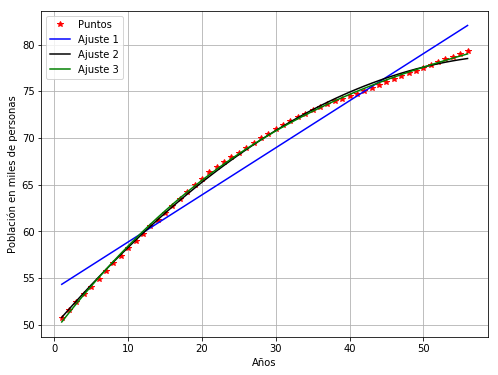

In [27]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'r*',ms = 6,label='Puntos')
plt.plot(x,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(x,yhat2,'k',ms = 6,label='Ajuste 2')
plt.plot(x,yhat3,'g',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('Población en miles de personas')
plt.show()

Text(0, 0.5, 'Error')

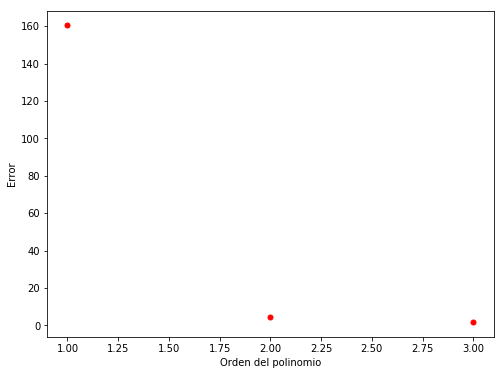

In [28]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

*Conclusión*

Según la gráfica anterior, el polinomio que mejor se ajusta es el de tercer orden.

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2016 (57) y compare con el dato real 79.577%.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [29]:
x = 57
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

yhat1,yhat2,yhat3,79.577

(82.54416014486628, 78.60805047106248, 79.21995326430978, 79.577)

*Conclusión*. El polinomio que mejor estima este dato es el polinomio de grado tres.